# Results

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

In [133]:
result_dir = "/Users/paul/PycharmProjects/causal_cell_embedding/results/sanitycheck"
seed = 9

In [134]:
with open(os.path.join(result_dir,'results_' 
          + str(seed) + '.pkl'), 'rb') as f:
    results = pickle.load(f)

In [135]:
results.keys()

dict_keys(['exp_name', 'config', 'seed', 'losses', 'best_epoch'])

In [136]:
results['config']

{'cuda': False,
 'seed': 9,
 'optimizer': {'Adam': {'lr': 0.0001}},
 'batch_size': 32,
 'n_epochs': 40,
 'dataset': {'train': {'L1000_iid': {'phase': 'phase2',
    'batch_size': 16,
    'restrict_to_envs_longer_than': 600}},
  'valid': {'L1000_iid': {'phase': 'phase2',
    'batch_size': 16,
    'restrict_to_envs_longer_than': 600}}},
 'model': {'basic_VAE': {'layers': [978, 978], 'beta': 10}},
 'experiment_name': 'sanitycheck'}

## Reconstruction loss

In [137]:
all_train_loss = []
for epoch in range(len(results['losses']['train'])):
    train_loss = np.mean([results['losses']['train'][epoch][i]['recon_loss'].detach().numpy() 
    for i in range(len(results['losses']['train'][epoch]))])
    all_train_loss.append(train_loss)

In [138]:
all_valid_loss = []
for epoch in range(len(results['losses']['valid'])):
    valid_loss = np.mean([results['losses']['valid'][epoch][i]['recon_loss'].numpy() 
    for i in range(len(results['losses']['valid'][epoch]))])
    all_valid_loss.append(valid_loss)

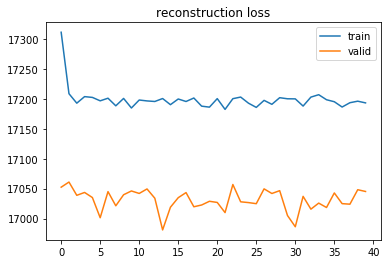

In [139]:
plt.plot(all_train_loss, label="train")
plt.plot(all_valid_loss, label="valid")
plt.title("reconstruction loss")
plt.legend()
plt.show()

## KL divergence loss

In [140]:
all_train_loss = []
for epoch in range(len(results['losses']['train'])):
    train_loss = np.mean([results['losses']['train'][epoch][i]['kl_div'].detach().numpy() 
    for i in range(len(results['losses']['train'][epoch]))])
    all_train_loss.append(train_loss)

In [141]:
all_valid_loss = []
for epoch in range(len(results['losses']['valid'])):
    valid_loss = np.mean([results['losses']['valid'][epoch][i]['kl_div'].numpy() 
    for i in range(len(results['losses']['valid'][epoch]))])
    all_valid_loss.append(valid_loss)

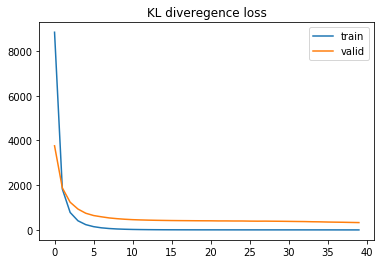

In [142]:
plt.plot(all_train_loss, label="train")
plt.plot(all_valid_loss, label="valid")
plt.title("KL diveregence loss")
plt.legend()
plt.show()